### Aki Sartolahti

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [164]:
# Open the data
df_workSatisfaction = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [165]:
# years_of_service
# family

In [166]:
df_workSatisfaction.head(n=10)

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN
5,6,2,31,2,2.0,14.0,1910,4,4.0,5,2,4,1.0,1.0,NaN,NaN
6,7,1,49,1,2.0,16.0,2066,3,5.0,4,2,2,NaN,NaN,1.0,NaN
7,8,1,55,1,1.0,0.0,2066,3,5.0,3,1,3,1.0,NaN,NaN,NaN
8,9,1,40,2,1.0,23.0,2768,2,4.0,4,2,4,NaN,1.0,NaN,NaN
9,10,1,33,1,1.0,16.0,2106,3,2.0,1,1,1,1.0,NaN,NaN,NaN


In [167]:
df_workSatisfaction = df_workSatisfaction.drop(['number','healtcare','holidayCabin','gym','muscleCare'], axis=1)
df_workSatisfaction

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3


In [168]:
df_workSatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  82 non-null     int64  
 1   age                     82 non-null     int64  
 2   family                  82 non-null     int64  
 3   education               81 non-null     float64
 4   years_of_service        80 non-null     float64
 5   salary                  82 non-null     int64  
 6   sat_management          82 non-null     int64  
 7   sat_colleques           81 non-null     float64
 8   sat_workingEnvironment  82 non-null     int64  
 9   sat_salary              82 non-null     int64  
 10  sat_tasks               82 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.2 KB


Drop rows with potentially null values

In [169]:
df_workSatisfaction.dropna(subset=['years_of_service', 'sat_colleques'], inplace=True)

In [170]:
df_workSatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  79 non-null     int64  
 1   age                     79 non-null     int64  
 2   family                  79 non-null     int64  
 3   education               79 non-null     float64
 4   years_of_service        79 non-null     float64
 5   salary                  79 non-null     int64  
 6   sat_management          79 non-null     int64  
 7   sat_colleques           79 non-null     float64
 8   sat_workingEnvironment  79 non-null     int64  
 9   sat_salary              79 non-null     int64  
 10  sat_tasks               79 non-null     int64  
dtypes: float64(3), int64(8)
memory usage: 7.4 KB


In [171]:
df_workSatisfaction.describe()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,1.240506,37.873418,1.620253,1.987342,11.873418,2564.506329,3.075949,4.075949,3.265823,2.126582,3.202532
std,0.430122,9.418159,0.488425,0.854755,8.437351,860.431479,1.059416,0.828532,1.140275,1.113634,1.030058
min,1.000000,20.000000,1.000000,1.000000,0.000000,1521.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,1.000000,31.000000,1.000000,1.000000,3.500000,2027.000000,2.000000,4.000000,3.000000,1.000000,3.000000
50%,1.000000,37.000000,2.000000,2.000000,12.000000,2300.000000,3.000000,4.000000,3.000000,2.000000,3.000000
75%,1.000000,44.000000,2.000000,3.000000,18.000000,2808.000000,4.000000,5.000000,4.000000,3.000000,4.000000
max,2.000000,59.000000,2.000000,4.000000,35.000000,6278.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [172]:
df_workSatisfaction.nlargest(n = 5, columns = 'years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
44,1,55,2,1.0,35.0,2651,4,5.0,4,2,4
45,2,51,2,1.0,28.0,1989,3,3.0,2,2,3
22,1,44,2,1.0,27.0,3510,4,4.0,4,4,4
31,1,45,2,1.0,24.0,2925,4,4.0,4,3,4
8,1,40,2,1.0,23.0,2768,2,4.0,4,2,4


In [173]:
df_workSatisfaction.nsmallest(n = 5, columns = 'years_of_service')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
7,1,55,1,1.0,0.0,2066,3,5.0,3,1,3
35,1,31,2,3.0,0.0,1559,2,4.0,3,1,3
61,1,40,2,1.0,0.0,1872,2,3.0,1,2,3
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4
24,1,43,2,3.0,1.0,2925,4,4.0,4,4,4


Categorize years of service

In [174]:
bins = [0, 5, 10, 15, 20, 35]
df_workSatisfaction['years_cat'] = pd.cut(df_workSatisfaction['years_of_service'], bins = bins, include_lowest=True, labels=['0-5', '5-10', '10-15', '15-20', '20-35'])
df_workSatisfaction

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,years_cat
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,20-35
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,5-10
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,5-10
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,10-15
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,0-5
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,0-5
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,5-10
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,15-20


In [175]:
df3 = pd.crosstab(df_workSatisfaction['years_cat'], 'Count')

df3.columns.name = ''

# Percentages
n = df3['Count'].sum()
df3['%'] = df3 / n * 100

df3.columns = ['Count', '%']
df3

,Count,%
years_cat,,
0-5,22,27.848101
5-10,16,20.253165
10-15,11,13.924051
15-20,15,18.987342
20-35,15,18.987342


In [226]:
df = df_workSatisfaction

df['family'] = df['family'].replace(1, 'Single')
df['family'] = df['family'].replace(2, 'Not Single')

df


,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,years_cat
0,1,38,Single,1.0,22.0,3587,3,3.0,3,3,3,20-35
1,1,29,Not Single,2.0,10.0,2963,1,5.0,2,1,3,5-10
2,1,30,Single,1.0,7.0,1989,3,4.0,1,1,3,5-10
3,1,36,Not Single,1.0,14.0,2144,3,3.0,3,3,3,10-15
4,1,24,Single,2.0,4.0,2183,2,3.0,2,1,2,0-5
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,Single,3.0,0.0,1598,4,4.0,4,3,4,0-5
78,1,33,Single,1.0,2.0,1638,1,3.0,2,1,2,0-5
79,1,27,Single,2.0,7.0,2612,3,4.0,3,3,3,5-10
80,1,35,Not Single,2.0,16.0,2808,3,4.0,3,3,3,15-20


In [227]:
df3 = pd.crosstab(df['family'], 'Count')

df3.columns.name = ''

# Percentages
n = df3['Count'].sum()
df3['%'] = df3 / n * 100

df3.columns = ['Count', '%']
df3

,Count,%
family,,
Not Single,49,62.025316
Single,30,37.974684


In [178]:
df_workSatisfaction['family'].value_counts()

family
2    49
1    30
Name: count, dtype: int64

Text(0.5, 1.0, 'Worker marriage status, n=79')

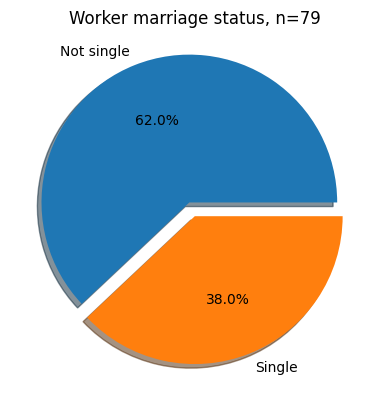

In [179]:
fig, ax = plt.subplots()
ax.pie(df_workSatisfaction['family'].value_counts(), labels=['Not single', 'Single'], autopct='%1.1f%%', shadow=True, explode=(0.1,0))
plt.title('Worker marriage status, n=' + str(df_workSatisfaction['family'].count()))

In [180]:
df_singles = df_workSatisfaction[df_workSatisfaction['family'] == 1]

In [181]:
df_notSingles = df_workSatisfaction[df_workSatisfaction['family'] == 2]

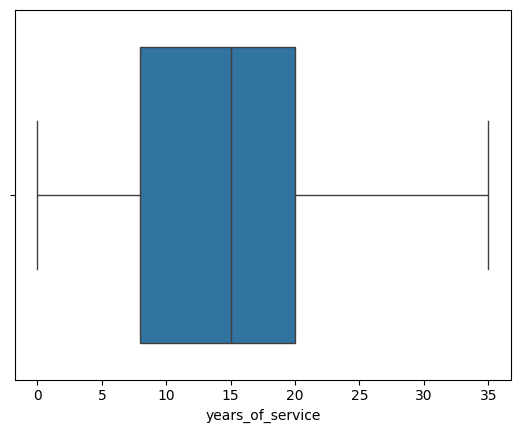

In [182]:
ax3 = sns.boxplot(x = df_notSingles['years_of_service'])

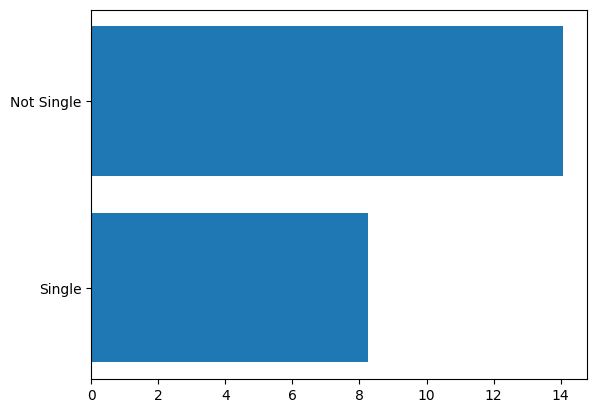

In [183]:
singles_years_avg = df_singles['years_of_service'].mean()
notSingles_years_avg = df_notSingles['years_of_service'].mean()

plt.barh(['Single','Not Single'], [singles_years_avg, notSingles_years_avg])
plt.show()

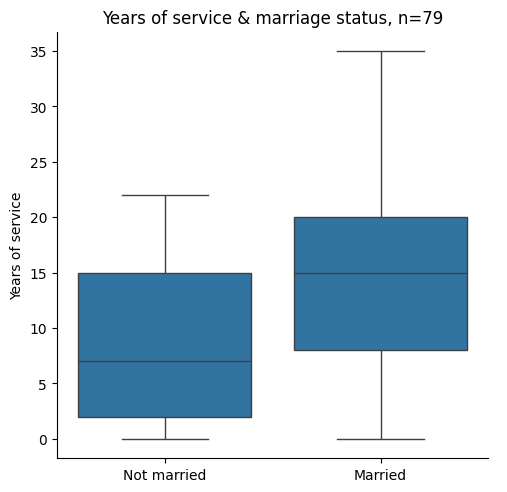

In [184]:
g = sns.catplot(data=df_workSatisfaction, x="family", y="years_of_service", kind="box").set(title='Years of service & marriage status, n=' + str(df_workSatisfaction['family'].count()))
g.set_axis_labels("", 'Years of service')
g.set_xticklabels(['Not married', 'Married'])

# Analysis of family and satisfaction variables

## Analysis of family and satisfaction with management

In [185]:
## Tommi  Käytä histogrammin sijasta baria
#df_workSatisfaction['sat_management']).plot.bar()


In [186]:
sat_management_freq = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_management'])
sat_management_freq.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_management_freq.index = ['Single', 'Not Single']

chi2_contingency(sat_management_freq)

Chi2ContingencyResult(statistic=np.float64(5.645230144005655), pvalue=np.float64(0.2272555077316395), dof=4, expected_freq=array([[ 2.65822785,  5.3164557 , 11.39240506,  8.35443038,  2.27848101],
       [ 4.34177215,  8.6835443 , 18.60759494, 13.64556962,  3.72151899]]))

In [187]:
sat_management_percents = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_management'], normalize='index')*100
sat_management_percents.index = ['Single', 'Not single']
sat_management_percents.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_management_percents

,Very dissatisfied,Dissatisfied,Neutral,Satisfied,Very satisfied
Single,13.333333,23.333333,43.333333,16.666667,3.333333
Not single,6.122449,14.285714,34.693878,34.693878,10.204082


In [188]:
sat_management_freq

,Very dissatisfied,Dissatisfied,Neutral,Satisfied,Very satisfied
Single,4,7,13,5,1
Not Single,3,7,17,17,5


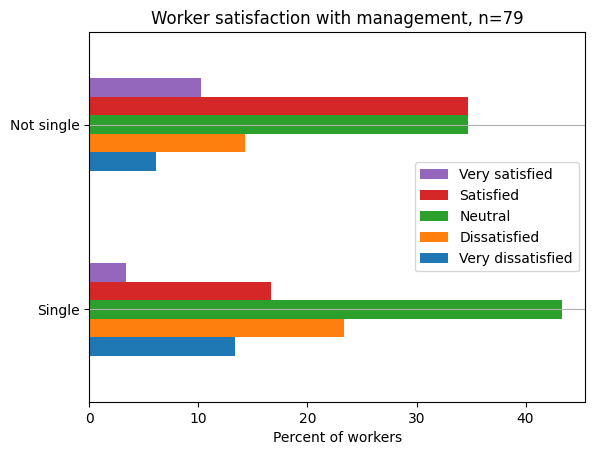

In [189]:
sat_management_percents.plot.barh(legend = 'reverse')

plt.title('Worker satisfaction with management, n=' + str(df_workSatisfaction['family'].count()))
plt.xlabel('Percent of workers')
plt.ylabel('')

plt.grid(axis = 'y')

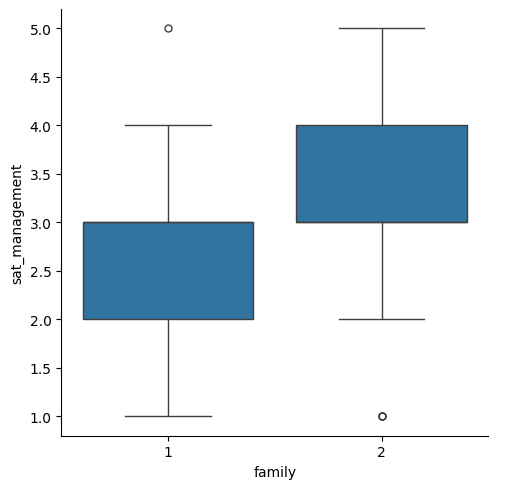

In [190]:
plot = sns.catplot(data=df_workSatisfaction, x="family", y="sat_management", kind='box')

## Analysis of family and satisfaction with colleques

,Dissatisfied,Neutral,Satisfied,Very satisfied
Single,2,6,13,9
Not Single,1,9,21,18


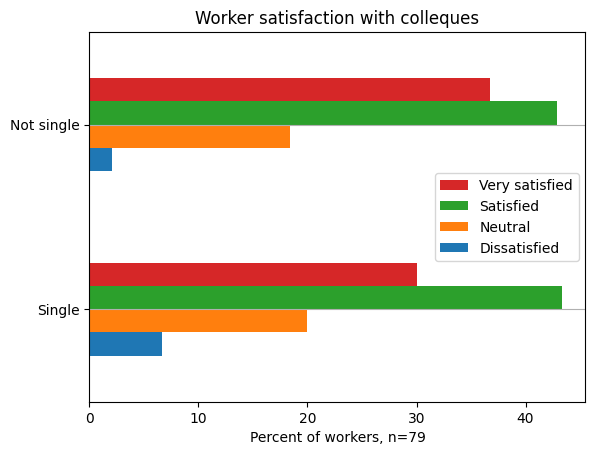

In [191]:
sat_colleque_freq = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_colleques'])
sat_colleque_freq.columns = ['Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_colleque_freq.index = ['Single', 'Not Single']

sat_colleque_percents = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_colleques'], normalize='index')*100
sat_colleque_percents.index = ['Single', 'Not single']
sat_colleque_percents.columns = ['Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_colleque_percents

sat_colleque_percents.plot.barh(legend = 'reverse')

plt.title('Worker satisfaction with colleques')
plt.xlabel('Percent of workers, n=' + str(df_workSatisfaction['family'].count()))
plt.ylabel('')

plt.grid(axis = 'y')

sat_colleque_freq

In [192]:
sat_colleque_percents

,Dissatisfied,Neutral,Satisfied,Very satisfied
Single,6.666667,20.000000,43.333333,30.000000
Not single,2.040816,18.367347,42.857143,36.734694


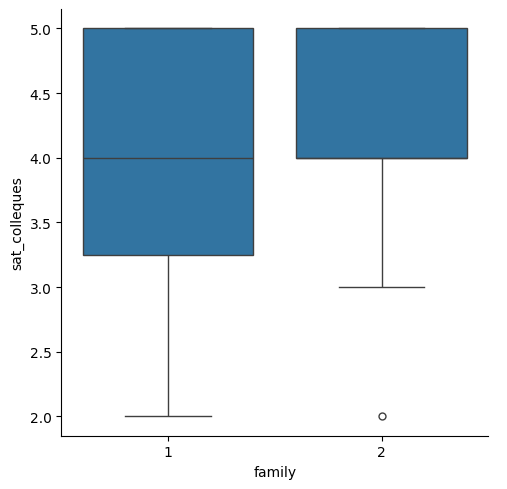

In [193]:
plot = sns.catplot(data=df_workSatisfaction, x="family", y="sat_colleques", kind='box')

In [194]:
chi2_contingency(sat_colleque_freq)

Chi2ContingencyResult(statistic=np.float64(1.3225676937441642), pvalue=np.float64(0.7237812577097544), dof=3, expected_freq=array([[ 1.13924051,  5.69620253, 12.91139241, 10.25316456],
       [ 1.86075949,  9.30379747, 21.08860759, 16.74683544]]))

,Very dissatisfied,Dissatisfied,Neutral,Satisfied,Very satisfied
Single,5,4,14,6,1
Not Single,3,4,15,17,10


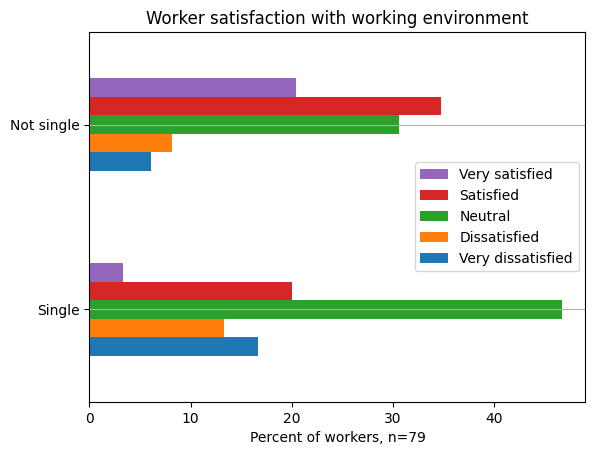

In [195]:
sat_workEnv_freq = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_workingEnvironment'])
sat_workEnv_freq.columns = ['Very dissatisfied','Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_workEnv_freq.index = ['Single', 'Not Single']

sat_workEnv_percents = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_workingEnvironment'], normalize='index')*100
sat_workEnv_percents.index = ['Single', 'Not single']
sat_workEnv_percents.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_workEnv_percents

sat_workEnv_percents.plot.barh(legend = 'reverse')

plt.title('Worker satisfaction with working environment')
plt.xlabel('Percent of workers, n=' + str(df_workSatisfaction['family'].count()))
plt.ylabel('')

plt.grid(axis = 'y')

sat_workEnv_freq

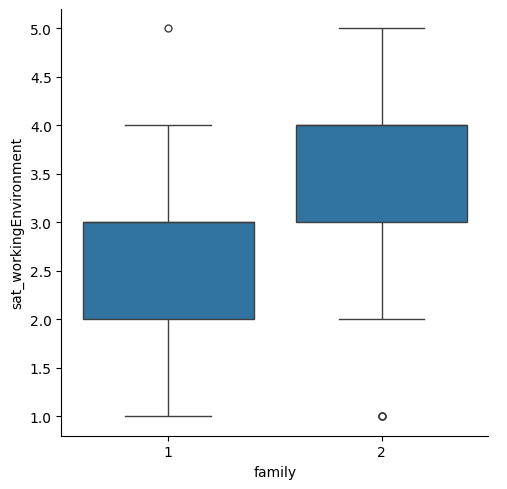

In [196]:
plot = sns.catplot(data=df_workSatisfaction, x="family", y="sat_workingEnvironment", kind='box')

In [197]:
chi2_contingency(sat_workEnv_freq)

Chi2ContingencyResult(statistic=np.float64(9.116708911314287), pvalue=np.float64(0.05824760213706489), dof=4, expected_freq=array([[ 3.03797468,  3.03797468, 11.01265823,  8.73417722,  4.17721519],
       [ 4.96202532,  4.96202532, 17.98734177, 14.26582278,  6.82278481]]))

,Very dissatisfied,Dissatisfied,Neutral,Satisfied,Very satisfied
Single,17,6,4,3,0
Not Single,14,13,14,7,1


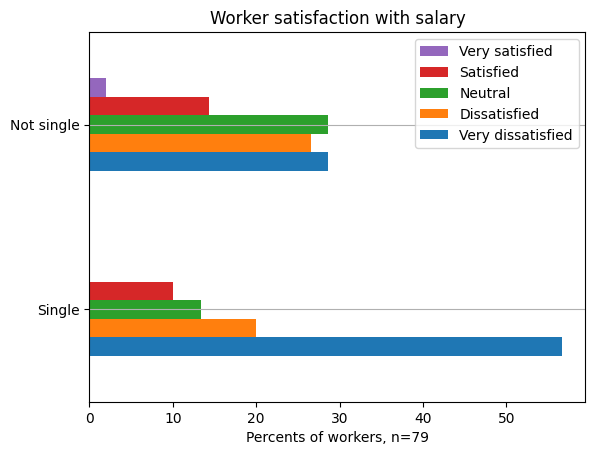

In [198]:
sat_salary_freq = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_salary'])
sat_salary_freq.columns = ['Very dissatisfied','Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_salary_freq.index = ['Single', 'Not Single']

sat_salary_percents = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_salary'], normalize='index')*100
sat_salary_percents.index = ['Single', 'Not single']
sat_salary_percents.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_salary_percents

sat_salary_percents.plot.barh(legend = 'reverse')

plt.title('Worker satisfaction with salary')
plt.xlabel('Percents of workers, n=' + str(df_workSatisfaction['family'].count()))
plt.ylabel('')

plt.grid(axis = 'y')

sat_salary_freq

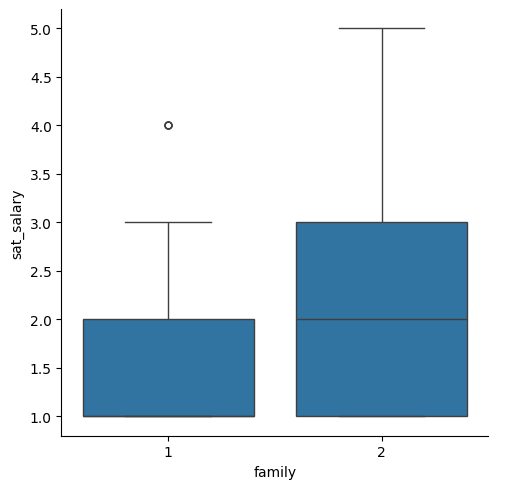

In [199]:
plot = sns.catplot(data=df_workSatisfaction, x="family", y="sat_salary", kind='box')

In [200]:
chi2_contingency(sat_salary_freq)

Chi2ContingencyResult(statistic=np.float64(6.851519723527969), pvalue=np.float64(0.1439458807929772), dof=4, expected_freq=array([[11.7721519 ,  7.21518987,  6.83544304,  3.79746835,  0.37974684],
       [19.2278481 , 11.78481013, 11.16455696,  6.20253165,  0.62025316]]))

,Very dissatisfied,Dissatisfied,Neutral,Satisfied,Very satisfied
Single,3,8,13,4,2
Not Single,2,5,16,21,5


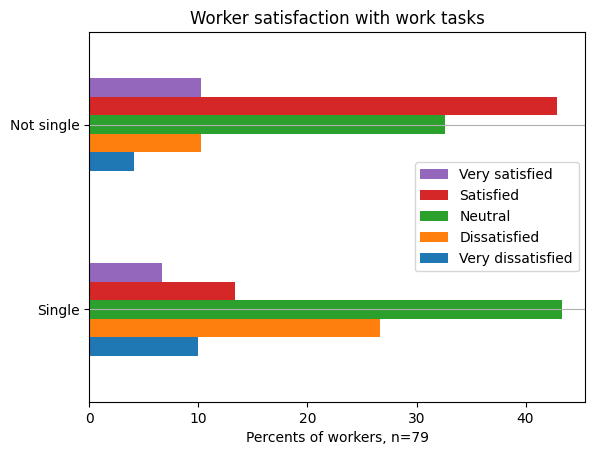

In [201]:
sat_tasks_freq = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_tasks'])
sat_tasks_freq.columns = ['Very dissatisfied','Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_tasks_freq.index = ['Single', 'Not Single']

sat_tasks_percents = pd.crosstab(df_workSatisfaction['family'], df_workSatisfaction['sat_tasks'], normalize='index')*100
sat_tasks_percents.index = ['Single', 'Not single']
sat_tasks_percents.columns = ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']
sat_tasks_percents

sat_tasks_percents.plot.barh(legend = 'reverse')

plt.title('Worker satisfaction with work tasks')
plt.xlabel('Percents of workers, n=' + str(df_workSatisfaction['family'].count()))
plt.ylabel('')

plt.grid(axis = 'y')

sat_tasks_freq

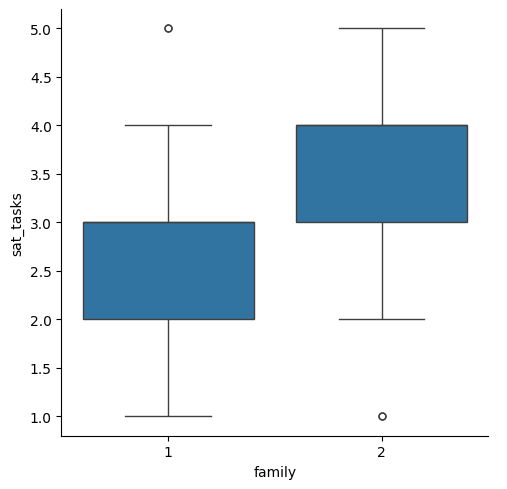

In [202]:
plot = sns.catplot(data=df_workSatisfaction, x="family", y="sat_tasks", kind='box')

In [203]:
chi2_contingency(sat_tasks_freq)

Chi2ContingencyResult(statistic=np.float64(10.060690005748418), pvalue=np.float64(0.03941768208908254), dof=4, expected_freq=array([[ 1.89873418,  4.93670886, 11.01265823,  9.49367089,  2.65822785],
       [ 3.10126582,  8.06329114, 17.98734177, 15.50632911,  4.34177215]]))

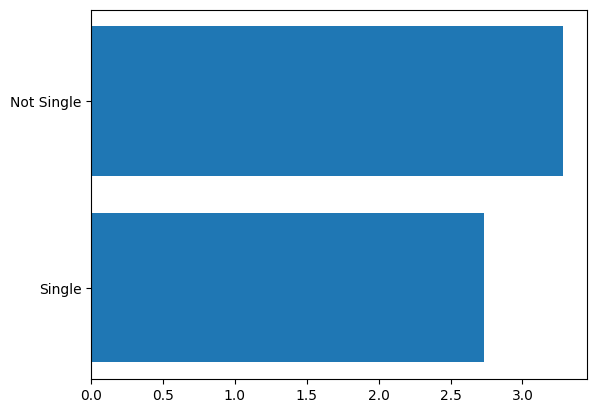

In [204]:
singles_management_avg = df_singles['sat_management'].mean()
notSingles_management_avg = df_notSingles['sat_management'].mean()

plt.barh(['Single','Not Single'], [singles_management_avg, notSingles_management_avg])
plt.show()

# Analysis of years of service and satisfaction variables

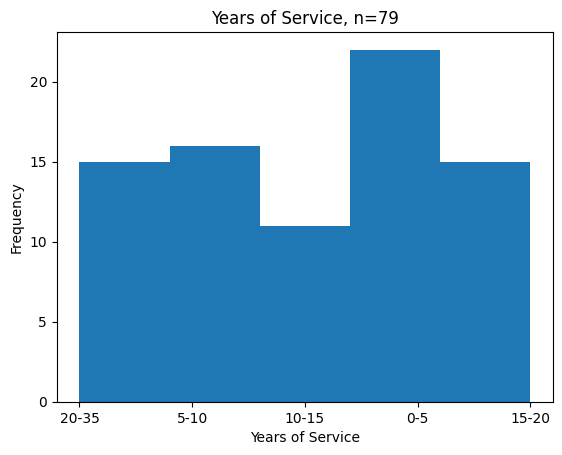

In [205]:
plt.hist(df_workSatisfaction['years_cat'],bins=5)

plt.title('Years of Service, n=' + str(df_workSatisfaction['years_cat'].count()))
plt.xlabel('Years of Service')
plt.ylabel('Frequency')

plt.show() 

In [206]:
df_workSatisfaction.loc[df_workSatisfaction['sat_management'] == 5].years_of_service

16     2.0
36    17.0
37     1.0
51    18.0
65    16.0
72     2.0
Name: years_of_service, dtype: float64

Make arrays of each workers service years seperated by their given grade of management satisfaction

Use the data to make a box plot

Repeat for each satisfaction column

Colleque satisfaction

Working Environment

Salary

Tasks

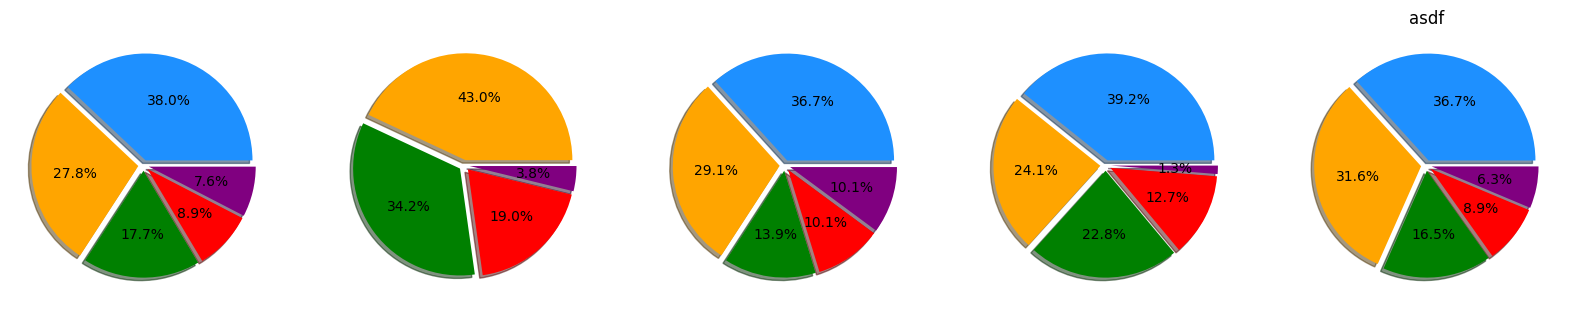

In [207]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5)

ax1.pie(df_workSatisfaction['sat_management'].value_counts(), autopct='%1.1f%%', shadow=True, explode=(0.05,0.05,0.05,0.05,0.05), colors=['DodgerBlue', 'orange', 'green', 'red', 'purple'])
ax2.pie(df_workSatisfaction['sat_colleques'].value_counts(), autopct='%1.1f%%', shadow=True, explode=(0.05,0.05,0.05,0.05), colors=['orange', 'green', 'red', 'purple'])
ax3.pie(df_workSatisfaction['sat_workingEnvironment'].value_counts(), autopct='%1.1f%%', shadow=True, explode=(0.05,0.05,0.05,0.05,0.05), colors=['DodgerBlue', 'orange', 'green', 'red', 'purple'])
ax4.pie(df_workSatisfaction['sat_salary'].value_counts(), autopct='%1.1f%%', shadow=True, explode=(0.05,0.05,0.05,0.05,0.05), colors=['DodgerBlue', 'orange', 'green', 'red', 'purple'])
ax5.pie(df_workSatisfaction['sat_tasks'].value_counts(), autopct='%1.1f%%', shadow=True, explode=(0.05,0.05,0.05,0.05,0.05), colors=['DodgerBlue', 'orange', 'green', 'red', 'purple'])

fig.set_figheight(30)
fig.set_figwidth(20)

labels = ["Very Unsatisfied", "Unsatisfied", "Neutral", "Satisfied", "Very Satisfied"]
plt.title("asdf")
plt.show()

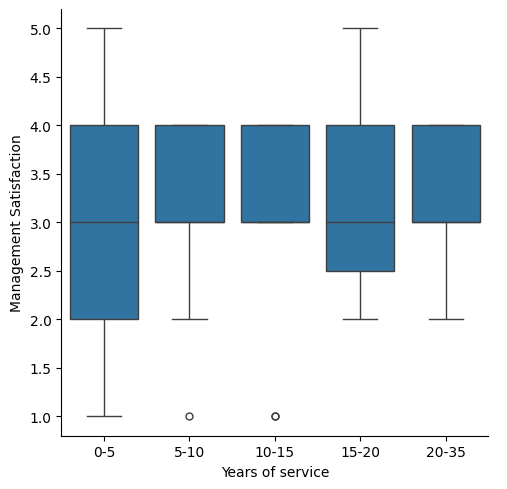

In [208]:
plot = sns.catplot(data=df_workSatisfaction, x="years_cat", y="sat_management", kind='box')

plot.set_axis_labels("Years of service", "Management Satisfaction")

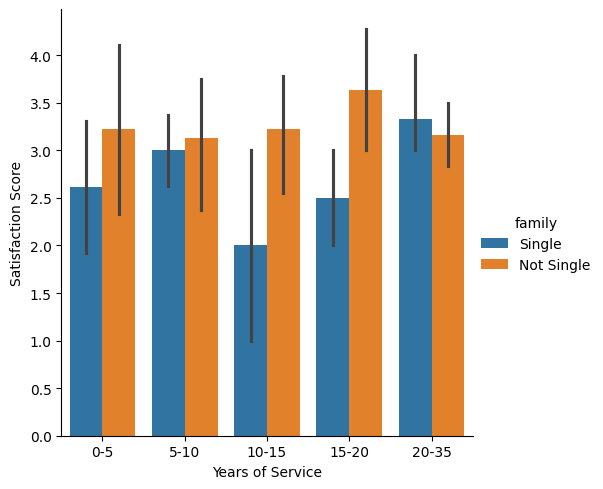

In [231]:
plot = sns.catplot(data=df_workSatisfaction, x="years_cat", y="sat_management", kind='bar', hue='family')

plot.set_axis_labels("Years of Service", "Satisfaction Score")

,Very dissatisfied,Dissatisfied,Neutral,Satisfied,Very satisfied
years_cat,,,,,
0-5,4,6,4,5,3
5-10,1,2,8,5,0
10-15,2,0,5,4,0
15-20,0,4,5,3,3
20-35,0,2,8,5,0


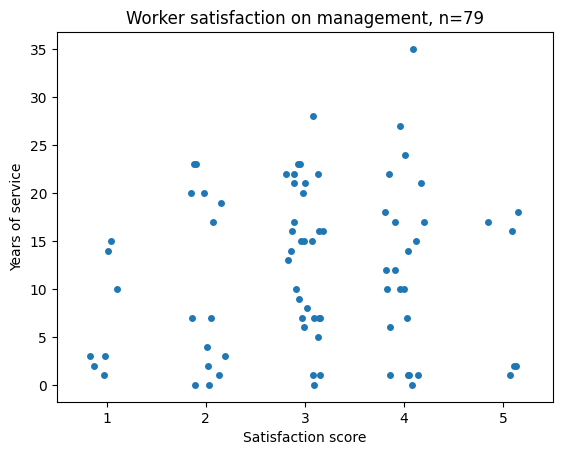

In [210]:
plot = sns.stripplot(x='sat_management', y='years_of_service', data=df_workSatisfaction, jitter=0.2)

sat_management_freq = pd.crosstab(df_workSatisfaction['years_cat'], df_workSatisfaction['sat_management'])
sat_management_freq.columns = ['Very dissatisfied','Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on management, n=" + str(df_workSatisfaction['years_of_service'].count()))

sat_management_freq

Text(0.5, 1.0, 'Worker satisfaction on management, n=79')

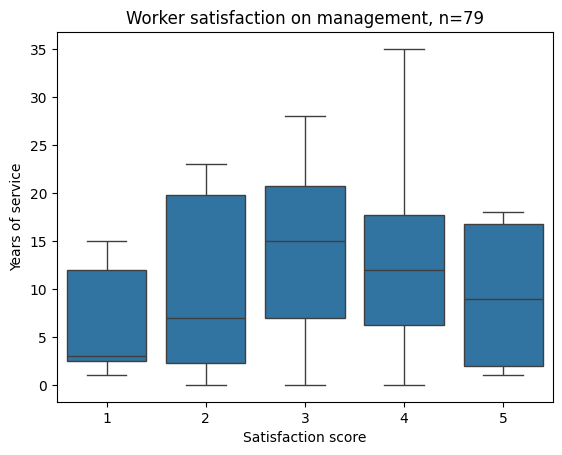

In [211]:
plot = sns.boxplot(x='sat_management', y='years_of_service', data=df_workSatisfaction)

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on management, n=" + str(df_workSatisfaction['years_of_service'].count()))

In [212]:
chi2_contingency(sat_management_freq)

Chi2ContingencyResult(statistic=np.float64(22.583385314180767), pvalue=np.float64(0.12533352924563612), dof=16, expected_freq=array([[1.94936709, 3.89873418, 8.35443038, 6.12658228, 1.67088608],
       [1.41772152, 2.83544304, 6.07594937, 4.4556962 , 1.21518987],
       [0.97468354, 1.94936709, 4.17721519, 3.06329114, 0.83544304],
       [1.32911392, 2.65822785, 5.69620253, 4.17721519, 1.13924051],
       [1.32911392, 2.65822785, 5.69620253, 4.17721519, 1.13924051]]))

,Dissatisfied,Neutral,Satisfied,Very satisfied
years_cat,,,,
0-5,1,4,9,8
5-10,0,3,10,3
10-15,0,2,6,3
15-20,2,2,4,7
20-35,0,4,5,6


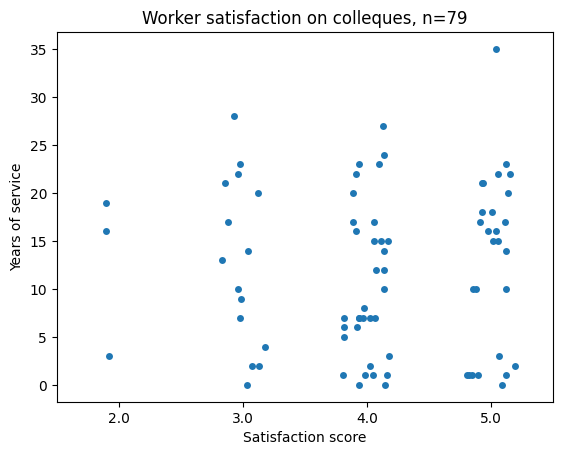

In [213]:
plot = sns.stripplot(x='sat_colleques', y='years_of_service', data=df_workSatisfaction, jitter=0.2)

sat_colleques_freq = pd.crosstab(df_workSatisfaction['years_cat'], df_workSatisfaction['sat_colleques'])
sat_colleques_freq.columns = ['Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on colleques, n=" + str(df_workSatisfaction['years_of_service'].count()))

sat_colleques_freq

Text(0.5, 1.0, 'Worker satisfaction on colleques, n=79')

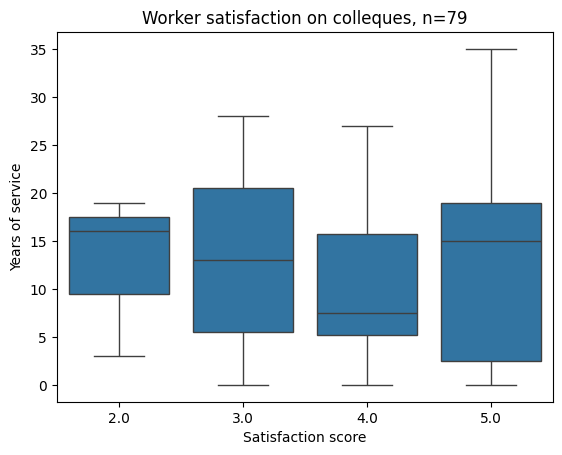

In [214]:
plot = sns.boxplot(x='sat_colleques', y='years_of_service', data=df_workSatisfaction)

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on colleques, n=" + str(df_workSatisfaction['years_of_service'].count()))

In [215]:
chi2_contingency(sat_colleques_freq)

Chi2ContingencyResult(statistic=np.float64(11.113302964283355), pvalue=np.float64(0.519234395777024), dof=12, expected_freq=array([[0.83544304, 4.17721519, 9.46835443, 7.51898734],
       [0.60759494, 3.03797468, 6.88607595, 5.46835443],
       [0.41772152, 2.08860759, 4.73417722, 3.75949367],
       [0.56962025, 2.84810127, 6.4556962 , 5.12658228],
       [0.56962025, 2.84810127, 6.4556962 , 5.12658228]]))

,Very dissatisfied,Dissatisfied,Neutral,Satisfied,Very satisfied
years_cat,,,,,
0-5,2,5,8,5,2
5-10,1,2,9,3,1
10-15,2,0,3,4,2
15-20,3,0,2,5,5
20-35,0,1,7,6,1


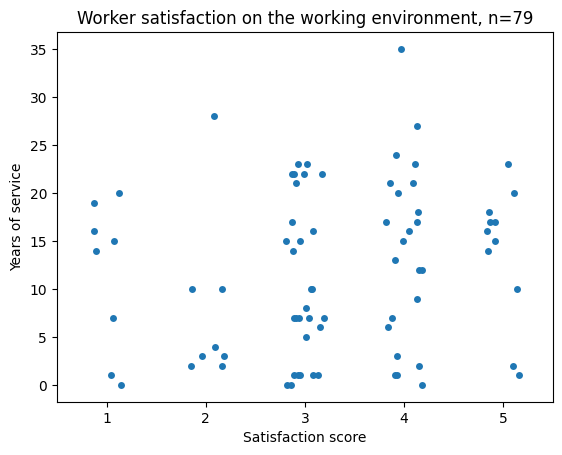

In [216]:
plot = sns.stripplot(x='sat_workingEnvironment', y='years_of_service', data=df_workSatisfaction, jitter=0.2)

sat_workEnvironment_freq = pd.crosstab(df_workSatisfaction['years_cat'], df_workSatisfaction['sat_workingEnvironment'])
sat_workEnvironment_freq.columns = ['Very dissatisfied','Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on the working environment, n=" + str(df_workSatisfaction['years_of_service'].count()))

sat_workEnvironment_freq

Text(0.5, 1.0, 'Worker satisfaction on the working environment, n=79')

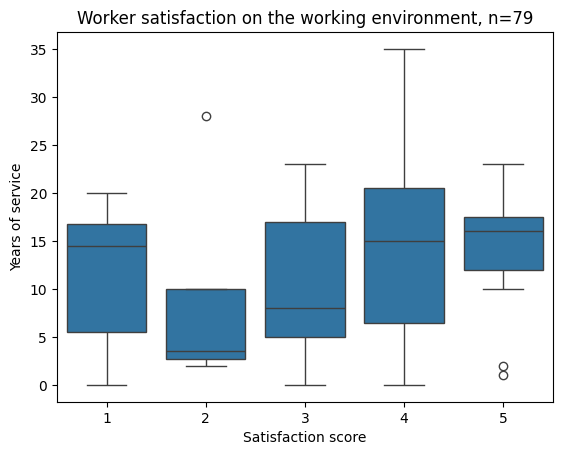

In [217]:
plot = sns.boxplot(x='sat_workingEnvironment', y='years_of_service', data=df_workSatisfaction)

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on the working environment, n=" + str(df_workSatisfaction['years_of_service'].count()))

In [218]:
chi2_contingency(sat_workEnvironment_freq)

Chi2ContingencyResult(statistic=np.float64(22.461160528981377), pvalue=np.float64(0.12891557245312968), dof=16, expected_freq=array([[2.2278481 , 2.2278481 , 8.07594937, 6.40506329, 3.06329114],
       [1.62025316, 1.62025316, 5.87341772, 4.65822785, 2.2278481 ],
       [1.11392405, 1.11392405, 4.03797468, 3.20253165, 1.53164557],
       [1.51898734, 1.51898734, 5.50632911, 4.36708861, 2.08860759],
       [1.51898734, 1.51898734, 5.50632911, 4.36708861, 2.08860759]]))

,Very dissatisfied,Dissatisfied,Neutral,Satisfied,Very satisfied
years_cat,,,,,
0-5,11,4,4,3,0
5-10,6,4,4,2,0
10-15,3,2,3,3,0
15-20,5,5,3,1,1
20-35,6,4,4,1,0


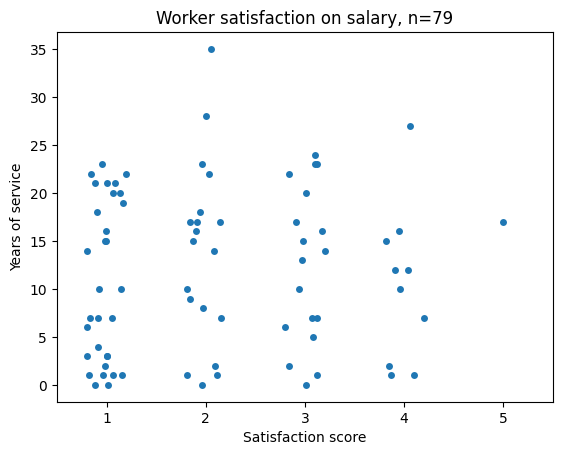

In [219]:
plot = sns.stripplot(x='sat_salary', y='years_of_service', data=df_workSatisfaction, jitter=0.2)

sat_salary_freq = pd.crosstab(df_workSatisfaction['years_cat'], df_workSatisfaction['sat_salary'])
sat_salary_freq.columns = ['Very dissatisfied','Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on salary, n=" + str(df_workSatisfaction['years_of_service'].count()))

sat_salary_freq

Text(0.5, 1.0, 'Worker satisfaction on salary, n=79')

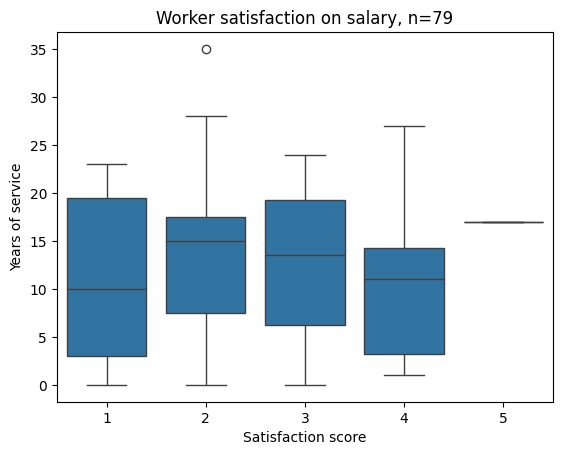

In [220]:
plot = sns.boxplot(x='sat_salary', y='years_of_service', data=df_workSatisfaction)

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on salary, n=" + str(df_workSatisfaction['years_of_service'].count()))

In [221]:
chi2_contingency(sat_salary_freq)

Chi2ContingencyResult(statistic=np.float64(9.734163565479353), pvalue=np.float64(0.8801372158276703), dof=16, expected_freq=array([[8.63291139, 5.29113924, 5.01265823, 2.78481013, 0.27848101],
       [6.27848101, 3.84810127, 3.64556962, 2.02531646, 0.20253165],
       [4.3164557 , 2.64556962, 2.50632911, 1.39240506, 0.13924051],
       [5.88607595, 3.60759494, 3.41772152, 1.89873418, 0.18987342],
       [5.88607595, 3.60759494, 3.41772152, 1.89873418, 0.18987342]]))

,Very dissatisfied,Dissatisfied,Neutral,Satisfied,Very satisfied
years_cat,,,,,
0-5,2,4,9,6,1
5-10,0,2,9,2,3
10-15,1,2,1,7,0
15-20,2,2,4,4,3
20-35,0,3,6,6,0


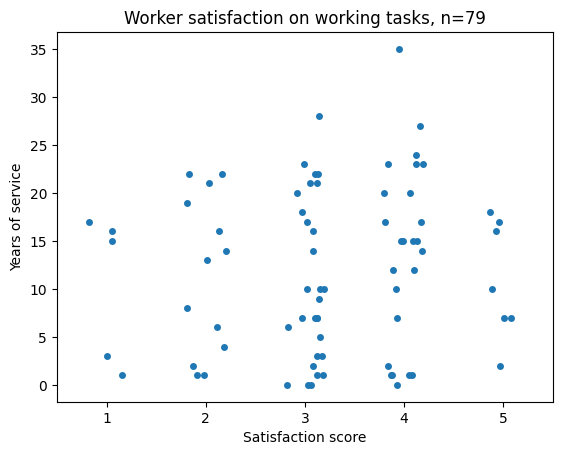

In [222]:
plot = sns.stripplot(x='sat_tasks', y='years_of_service', data=df_workSatisfaction, jitter=0.2)

sat_tasks_freq = pd.crosstab(df_workSatisfaction['years_cat'], df_workSatisfaction['sat_tasks'])
sat_tasks_freq.columns = ['Very dissatisfied','Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied']

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on working tasks, n=" + str(df_workSatisfaction['years_of_service'].count()))

sat_tasks_freq

Text(0.5, 1.0, 'Worker satisfaction on working tasks, n=79')

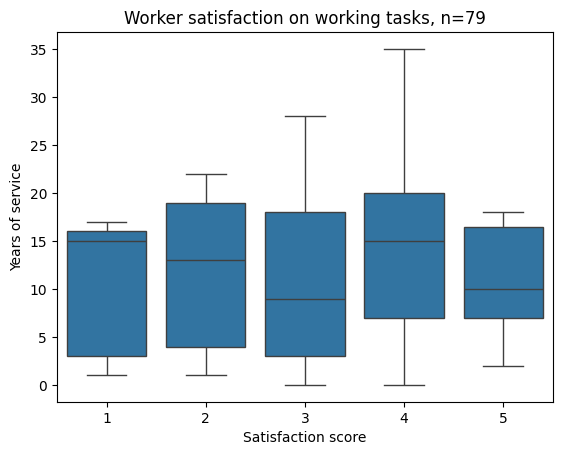

In [223]:
plot = sns.boxplot(x='sat_tasks', y='years_of_service', data=df_workSatisfaction)

plot.set_xlabel("Satisfaction score")
plot.set_ylabel("Years of service")
plot.set_title("Worker satisfaction on working tasks, n=" + str(df_workSatisfaction['years_of_service'].count()))

In [224]:
chi2_contingency(sat_tasks_freq)

Chi2ContingencyResult(statistic=np.float64(21.074317475627822), pvalue=np.float64(0.17567154325353013), dof=16, expected_freq=array([[1.39240506, 3.62025316, 8.07594937, 6.96202532, 1.94936709],
       [1.01265823, 2.63291139, 5.87341772, 5.06329114, 1.41772152],
       [0.69620253, 1.81012658, 4.03797468, 3.48101266, 0.97468354],
       [0.94936709, 2.46835443, 5.50632911, 4.74683544, 1.32911392],
       [0.94936709, 2.46835443, 5.50632911, 4.74683544, 1.32911392]]))

<Axes: xlabel='sat_management', ylabel='years_of_service'>

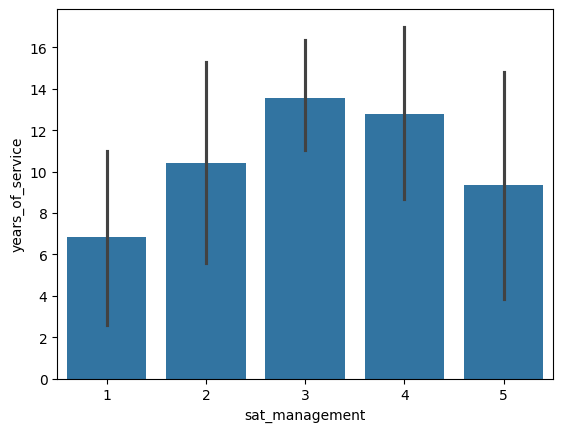

In [225]:
sns.barplot(x='sat_management', y='years_of_service', data=df_workSatisfaction, estimator=np.mean, errorbar=('ci', 95))